Yosuf Wakili - Gaming Behavior Prediction Model - Supervised Machine Learning Classification

Import libraries needed for code

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

Read in .csv file and inspect structure and organization of the data set

In [2]:
df = pd.read_csv('gaming.csv')
df

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,49029,32,Male,USA,Strategy,20.619662,0,Easy,4,75,85,14,Medium
40030,49030,44,Female,Other,Simulation,13.539280,0,Hard,19,114,71,27,High
40031,49031,15,Female,USA,RPG,0.240057,1,Easy,10,176,29,1,High
40032,49032,34,Male,USA,Sports,14.017818,1,Medium,3,128,70,10,Medium


Check for missing values and check data types

In [3]:
print(df.isnull().sum())
print(df.dtypes)
for column in df.columns:
    print(f"Unique values of {column}: {df[column].unique()}")

PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64
PlayerID                       int64
Age                            int64
Gender                        object
Location                      object
GameGenre                     object
PlayTimeHours                float64
InGamePurchases                int64
GameDifficulty                object
SessionsPerWeek                int64
AvgSessionDurationMinutes      int64
PlayerLevel                    int64
AchievementsUnlocked           int64
EngagementLevel               object
dtype: object
Unique values of PlayerID: [ 9000  9001  9002 ... 49031 49032 49033]
Unique values of Age

Encode categorial data (object data types to numeric) so that they can be used for machine learning purposes

In [4]:
#One-hot encoding for object data types where order does not matter
one_hot_df = pd.get_dummies(df, columns=['Gender', 'Location', 'GameGenre'], dtype=int)
#Ordinal encoding for object where order is important
one_hot_df["GameDifficulty"] = one_hot_df["GameDifficulty"].replace(['Easy', 'Medium', 'Hard'], [0, 1, 2])
one_hot_df["EngagementLevel"] = one_hot_df["EngagementLevel"].replace(['Low', 'Medium', 'High'], [0, 1, 2])
enc_df = one_hot_df
enc_df

C:\Users\yosef\AppData\Local\Temp\ipykernel_15296\2276147251.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  one_hot_df["GameDifficulty"] = one_hot_df["GameDifficulty"].replace(['Easy', 'Medium', 'Hard'], [0, 1, 2])
C:\Users\yosef\AppData\Local\Temp\ipykernel_15296\2276147251.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  one_hot_df["EngagementLevel"] = one_hot_df["EngagementLevel"].replace(['Low', 'Medium', 'High'], [0, 1, 2])


,PlayerID,Age,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,...,Gender_Male,Location_Asia,Location_Europe,Location_Other,Location_USA,GameGenre_Action,GameGenre_RPG,GameGenre_Simulation,GameGenre_Sports,GameGenre_Strategy
0,9000,43,16.271119,0,1,6,108,79,25,1,...,1,0,0,1,0,0,0,0,0,1
1,9001,29,5.525961,0,1,5,144,11,10,1,...,0,0,0,0,1,0,0,0,0,1
2,9002,22,8.223755,0,0,16,142,35,41,2,...,0,0,0,0,1,0,0,0,1,0
3,9003,35,5.265351,1,0,9,85,57,47,1,...,1,0,0,0,1,1,0,0,0,0
4,9004,33,15.531945,0,1,2,131,95,37,1,...,1,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,49029,32,20.619662,0,0,4,75,85,14,1,...,1,0,0,0,1,0,0,0,0,1
40030,49030,44,13.539280,0,2,19,114,71,27,2,...,0,0,0,1,0,0,0,1,0,0
40031,49031,15,0.240057,1,0,10,176,29,1,2,...,0,0,0,0,1,0,1,0,0,0
40032,49032,34,14.017818,1,1,3,128,70,10,1,...,1,0,0,0,1,0,0,0,1,0


Inspect correlation heatmap of features

<Axes: >

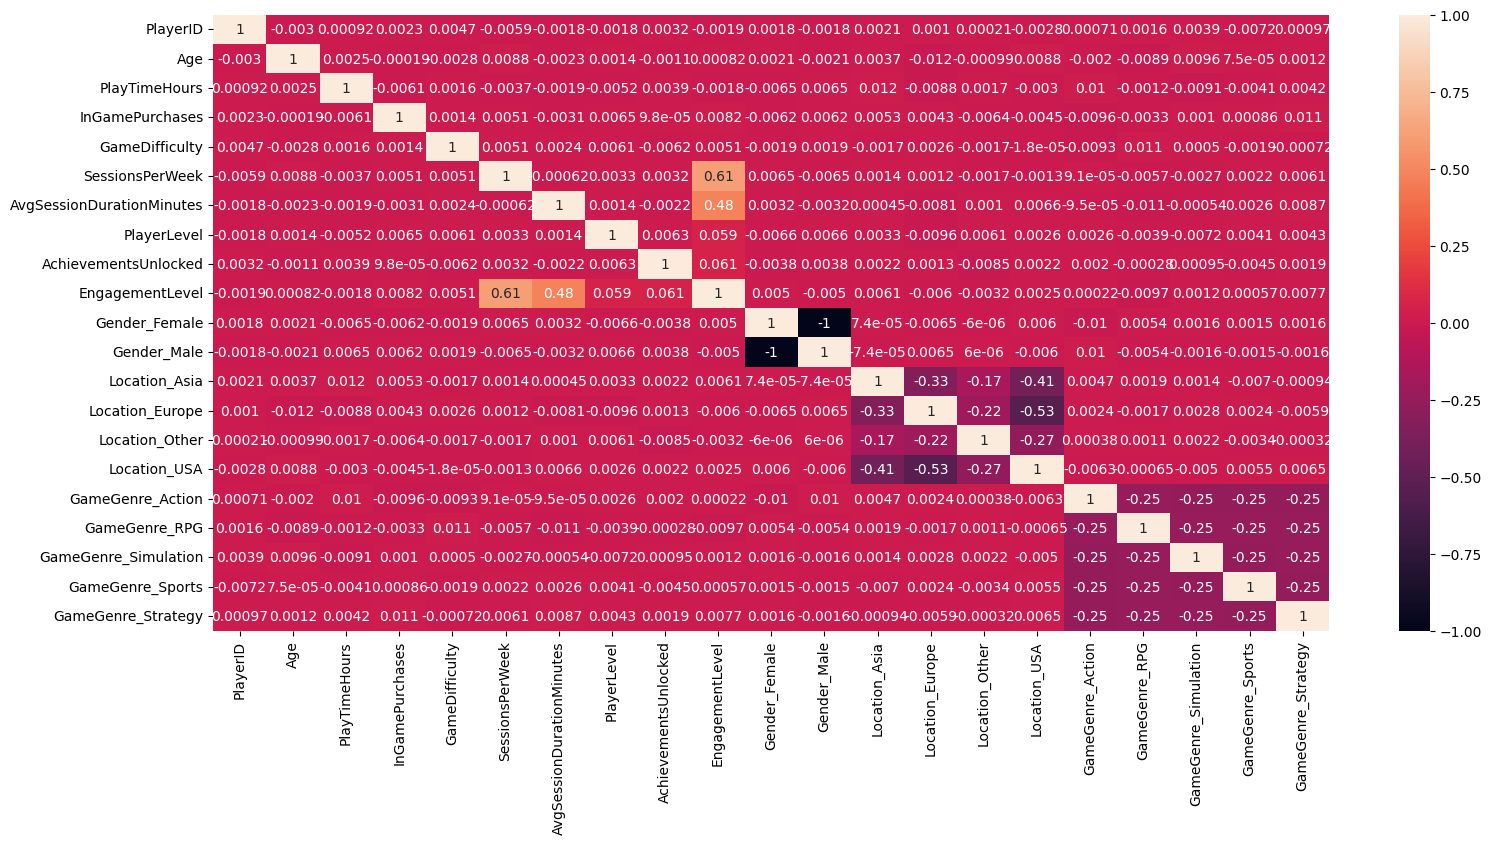

In [5]:
plt.figure(figsize=(18,8))

sns.heatmap(enc_df.corr(), annot=True)

We can see that EngagementLevel is heavily correlated with SessionsPerWeek and AvgSessionDurationMinutes

Now we can start creating our test/train splits and set up our classification models

Use GridSearchCV to find optimal parameters for RandomForest

In [6]:
X = enc_df.drop("EngagementLevel", axis=1)
y = enc_df["EngagementLevel"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020)

forest = RandomForestClassifier(random_state=2020)
forest_params = {'n_estimators': [150, 200, 250, 300], 'criterion': ['entropy'], 'max_depth': [15, 20, 25, 30]}
forest_search = GridSearchCV(forest, forest_params, scoring='f1_weighted')
forest_search.fit(X_train.sample(n=3000, random_state=20), y_train.sample(n=3000, random_state=20))
forest_search.best_params_

{'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 200}

Make predictions using the model and print a classification report to judge how far off the predictions are to the actual values

In [7]:
forest = RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=200, random_state=2020)
forest.fit(X_train, y_train)
forest_preds = forest.predict(X_test)
print(classification_report(y_test, forest_preds))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89      2098
           1       0.90      0.95      0.92      3847
           2       0.91      0.87      0.89      2062

    accuracy                           0.91      8007
   macro avg       0.91      0.90      0.90      8007
weighted avg       0.91      0.91      0.91      8007



Repeat this process for K-nearest Neighbors

In [56]:
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.fit_transform(X_test)

In [59]:
knn = KNeighborsClassifier()
knn_params = {'n_neighbors': range(1,31), 'weights': ['uniform', 'distance']}
knn_search = GridSearchCV(knn, knn_params, scoring='f1_weighted')
knn_search.fit(X_train_std, y_train)
knn_search.best_params_

{'n_neighbors': 12, 'weights': 'distance'}

In [60]:
knn = KNeighborsClassifier(n_neighbors=12, p=1, weights='distance')
knn.fit(X_train_std, y_train)
knn_preds = knn.predict(X_test_std)
print(classification_report(y_test, knn_preds))

              precision    recall  f1-score   support

           0       0.80      0.52      0.63      2098
           1       0.69      0.89      0.78      3847
           2       0.85      0.69      0.76      2062

    accuracy                           0.74      8007
   macro avg       0.78      0.70      0.72      8007
weighted avg       0.76      0.74      0.74      8007



Repeat this for SupportVectorClassification

In [52]:
svc = LinearSVC(random_state=2020)
svc_params = {"C": np.logspace(-3,2,6)}
svc_search = GridSearchCV(svc, svc_params, scoring='f1_weighted')
svc_search.fit(X_train_std, y_train)
svc_search.best_params_

{'C': np.float64(0.1)}

In [53]:
svc = LinearSVC(random_state=2020, C=0.1)
svc.fit(X_train_std, y_train)
svc_preds = svc.predict(X_test_std)
print(classification_report(y_test, svc_preds))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76      2098
           1       0.81      0.86      0.84      3847
           2       0.85      0.85      0.85      2062

    accuracy                           0.82      8007
   macro avg       0.82      0.81      0.82      8007
weighted avg       0.82      0.82      0.82      8007

